In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import f1_score, recall_score, confusion_matrix, precision_score, ConfusionMatrixDisplay

In [43]:
df = pd.read_csv("hf://datasets/Rodrigopiva/Social_Network_Ads.csv/Social_Network_Ads.csv")

In [44]:
df.keys()

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [46]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [47]:
oh_encoder = OneHotEncoder()

data_categories = oh_encoder.fit_transform(df[['Gender']])

data_categories_encoded = pd.DataFrame(data_categories.toarray(), columns=oh_encoder.get_feature_names_out())

In [49]:
df = pd.concat([df, data_categories_encoded], axis=1)
df = df.iloc[:, [2,3,4,5,6]]

df.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0.0,1.0
1,35,20000,0,0.0,1.0
2,26,43000,0,1.0,0.0
3,27,57000,0,1.0,0.0
4,19,76000,0,0.0,1.0


In [50]:
df.describe()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,400.000000,400.000000,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500,0.510000,0.490000
std,10.482877,34096.960282,0.479864,0.500526,0.500526
min,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,46.000000,88000.000000,1.000000,1.000000,1.000000
max,60.000000,150000.000000,1.000000,1.000000,1.000000


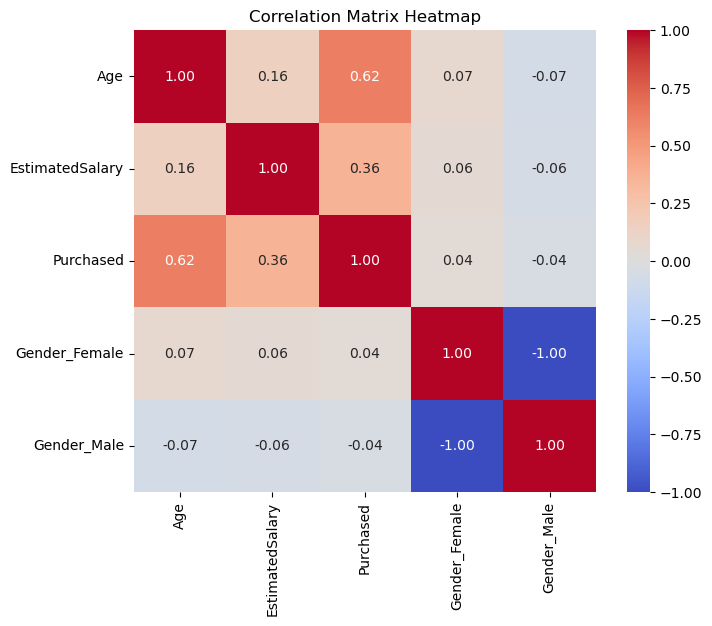

In [51]:
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sb.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'Purchased'}>,
        <Axes: title={'center': 'Gender_Female'}>],
       [<Axes: title={'center': 'Gender_Male'}>, <Axes: >]], dtype=object)

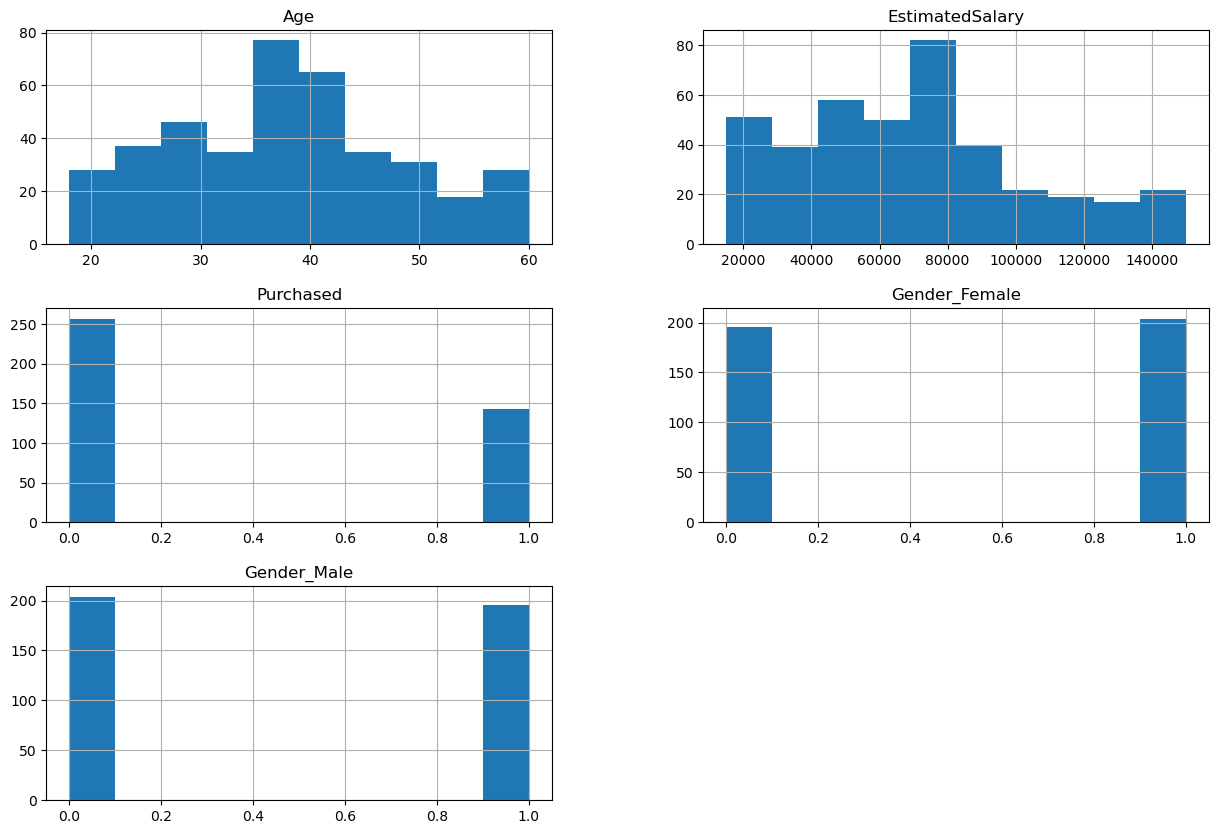

In [52]:
df.hist(figsize=(15,10))

In [65]:
x_values = df.iloc[:, [0,1,3,4]]
y_values = df.iloc[:, [2]]

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)


In [66]:
std_scaler = StandardScaler()

x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.fit_transform(x_test)

In [67]:
log_reg = LogisticRegression(random_state=42)

log_reg.fit(x_train, y_train)

/home/emanuel/Developer/Personal/learning-ia/ml-logistic-regression/.conda/lib/python3.11/site-packages/sklearn/utils/validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [ ]:
predictions = log_reg.predict(x_test)


Precision Score:  0.875
Recall Score:  0.75
F1 Score:  0.8076923076923077


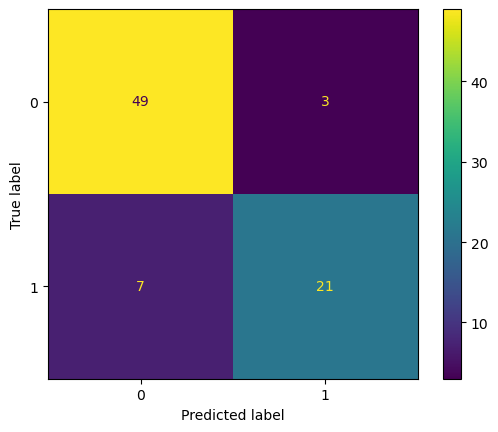

In [89]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
confusion = confusion_matrix(y_test, predictions)

print("Precision Score: ", precision)
print("Recall Score: ", recall)
print("F1 Score: ", f1)

cmdisp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=log_reg.classes_)
cmdisp.plot()

plt.show()